In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as ss
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_roc_curve, roc_auc_score, roc_curve, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pandas.util.testing as tm

C:\Users\Pavilion\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('Adult_Clean.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Age,Workclass,Final Weight,Education,Years of Education,Marital Status,Occupation,Role in Family,Race,Gender,Capital Gain,Capital Loss,Workhours per Week,Native Country,Income
0,90,Private,77053,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Adm-clerical,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,Middle-School,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
print('The cleaned Dataframe contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The cleaned Dataframe contains 32537 rows and 15 columns


In [4]:
df_desc = pd.read_csv('df_desc.csv')
df_desc.drop('Unnamed: 0', axis = 1, inplace = True)
df_desc

,Feature Name,Feature Type,Null Count,Null Percentage,Unique Data,Unique Data Sample
0,Age,int64,0,0.0,73,"[39, 30]"
1,Workclass,object,0,0.0,4,"['Private', 'Government']"
2,Final Weight,int64,0,0.0,21648,"[277886, 200479]"
3,Education,object,0,0.0,12,"['HS-grad', 'Some-college']"
4,Years of Education,int64,0,0.0,16,"[6, 12]"
5,Marital Status,object,0,0.0,5,"['Divorced', 'Single']"
6,Occupation,object,0,0.0,14,"['Armed-Forces', 'Machine-op-inspct']"
7,Role in Family,object,0,0.0,6,"['Other-relative', 'Own-child']"
8,Race,object,0,0.0,5,"['Amer-Indian-Eskimo', 'Asian-Pac-Islander']"
9,Gender,object,0,0.0,2,"['Male', 'Male']"


In [5]:
df_1 = pd.read_csv('df_1.csv')
df_1.drop('Unnamed: 0', axis = 1, inplace = True)

df_corr_merge = pd.read_csv('df_corr_merge.csv')
df_corr_merge.rename(columns = {'Unnamed: 0' : 'Features'}, inplace = True)
df_corr_merge.set_index('Features', inplace = True)

# Building Model

In [6]:
x = df_1.drop('Income', axis = 1)
y = df_1['Income']

## Feature Selection

From class, I learned that there are 3 methods to select the best features in a dataframe. Those methods are : Correlation, Univariate Selection (Using chi2 method), and Feature Importance (ExtraTreesClassifier). I already did the Correlation method so I'm going to perform the other two methods.

### Univariate Selection (Using chi2 method)

For this method to function properly, we have to transform all categorical features into continous data. We already did that on the previous notebook.

In [7]:
fs = SelectKBest(score_func = chi2, k = 11)
fs.fit(x,y)
dfscores = pd.DataFrame(fs.fit(x,y).scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score'))  

                 Specs        Score
0                  Age  8590.317129
9   Workhours per Week  6468.865417
6       Role in Family  3658.215060
3   Years of Education  2399.035890
4       Marital Status  1800.533027
8               Gender   501.968535
2            Education   483.018972
5           Occupation   362.573891
7                 Race    33.012176
10      Native Country     4.197041
1            Workclass     1.209922


The top 5 features from this method are Age, Workhours per Week, Role in Family, Years of Education, and Marital Status.

### Feature Importance (ExtraTreesClassifier)

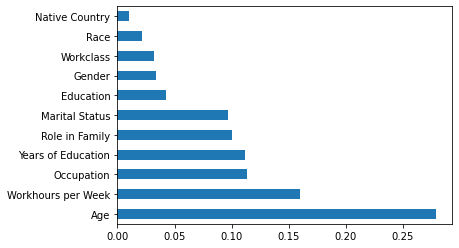

In [8]:
XTree = ExtraTreesClassifier()
XTree.fit(x,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(XTree.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

The top 5 features from this method are Age, Workhours per Week, Occupation, Years of Education, and Role in Family.

### Correlation

In [9]:
df_corr_merge.sort_values(ascending = False, by = 'Correlation Ratio 2')

,Correlation Ratio,Correlation Ratio 2,Type,Difference
Features,,,,
Income,0.999916,1.000000,int32,0.000
Years of Education,0.335272,0.335272,int64,0.000
Marital Status,0.436853,0.260273,int32,0.177
Role in Family,0.453353,0.250948,int32,0.202
Age,0.234037,0.234037,int64,0.000
Workhours per Week,0.229658,0.229658,int64,0.000
Gender,0.215825,0.215969,int32,0.000
Education,0.368404,0.087201,int32,0.281
Race,0.100243,0.071847,int32,0.028


The top 5 features from this method are Years of Education, Marital Status, Role in Family, Age, Workhours per Week. <br>
Although there is a similar top 5 features between 3 methods, It's not really wise to drop other features. So for building this model, I will use all 11 features.

## Outliers

Before we build our model, first we detect outliers in numerical feature.

In [10]:
nums_feature = df.drop(['Final Weight', 'Capital Gain', 'Capital Loss'], axis = 1).select_dtypes('int64').columns

In [11]:
outlier = []
Q1 = {}
Q3 = {}
IQR = {}
len_data_outlier = {}

for i in nums_feature:
    Q1[i] = df[i].describe()['25%']
    Q3[i] = df[i].describe()['75%']
    IQR[i] = Q3[i] - Q1[i]
    len_data_outlier[i] = len(df[(df[i] < Q1[i] - (1.5*IQR[i])) | (df[i] > Q3[i] + (1.5 * IQR[i]))])
    
for i,j in len_data_outlier.items():
    if j == 0:
        print('There is no outlier in feature {}'.format(i))
    else:
        print('There is outliers in feature {}'.format(i))
        outlier.append(i)

There is outliers in feature Age
There is outliers in feature Years of Education
There is outliers in feature Workhours per Week


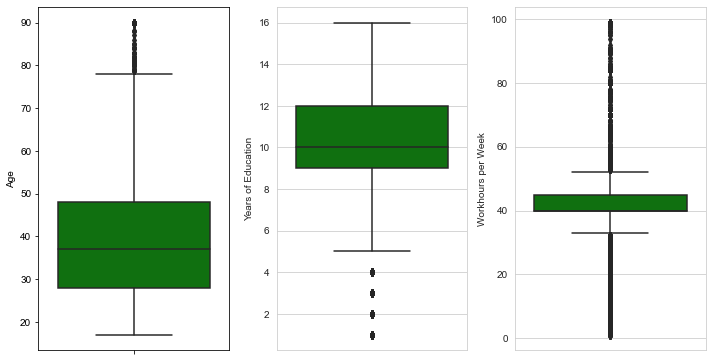

In [12]:
number_of_columns = 3
number_of_rows = len(nums_feature)-1/number_of_columns

plt.figure(figsize=(10,15))
for i in range(0,len(nums_feature)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[nums_feature[i]],color='green',orient='v')
    plt.tight_layout()

For this 3 features above, we are going to use Robust Scaler to treat its outlier.

## Baseline Model with Scaled Data

In this part, I try to make a baseline model in which, we get the base accuracy score using a Logistic Regression Model with using scaled data on numerical feature.

In [13]:
x = df_1.drop('Income', axis = 1)
y = df_1['Income']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26029, 11), (26029,), (6508, 11), (6508,))

We do scaling after splitting data to prevent data leakage.

In [15]:
x_train_num = x_train[['Age', 'Years of Education', 'Workhours per Week']]
x_train_cat = x_train.drop(['Age', 'Years of Education', 'Workhours per Week'], axis = 1)

x_test_num = x_test[['Age', 'Years of Education', 'Workhours per Week']]
x_test_cat = x_test.drop(['Age', 'Years of Education', 'Workhours per Week'], axis = 1)

In [16]:
x_train_numscl = pd.DataFrame(RobustScaler().fit_transform(x_train_num), 
                              columns = ['Age', 'Years of Education', 'Workhours per Week'],
                              index = x_train_num.index)

x_test_numscl = pd.DataFrame(RobustScaler().fit_transform(x_test_num), 
                              columns = ['Age', 'Years of Education', 'Workhours per Week'],
                              index = x_test_num.index)

In [17]:
x_train_scl = pd.concat([x_train_numscl, x_train_cat], axis = 1)
x_test_scl = pd.concat([x_test_numscl, x_test_cat], axis = 1)
x_train_scl.shape, y_train.shape, x_test_scl.shape, y_test.shape

((26029, 11), (26029,), (6508, 11), (6508,))

In [18]:
lr_bm = LogisticRegression()
lr_bm.fit(x_train_scl, y_train)

y_pred_lrbm = lr_bm.predict(x_test_scl)

accu_lrbm = accuracy_score(y_test, y_pred_lrbm)

print('Score for test data in Logistic Regression Model with scaled data is {:.4f}'.format(accu_lrbm))

Score for test data in Logistic Regression Model with scaled data is 0.8053


In [19]:
cv_score_lrbm = cross_val_score(lr_bm, x_train_scl, y_train, cv = 5)
print(cv_score_lrbm.mean())

0.8053708294168814


In [20]:
print(classification_report(y_test, y_pred_lrbm))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4975
           1       0.63      0.41      0.50      1533

    accuracy                           0.81      6508
   macro avg       0.74      0.67      0.69      6508
weighted avg       0.79      0.81      0.79      6508



## Handling Imbalanced Data

Let's take a look at our target variable (Income feature)

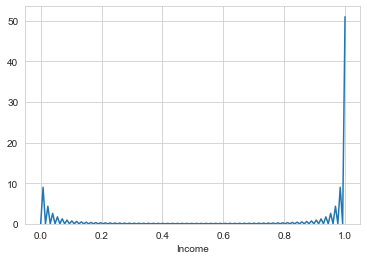

In [21]:
sns.distplot(df_1['Income'], hist = False)

In [22]:
df['Income'].value_counts()

<=50K    24698
>50K      7839
Name: Income, dtype: int64

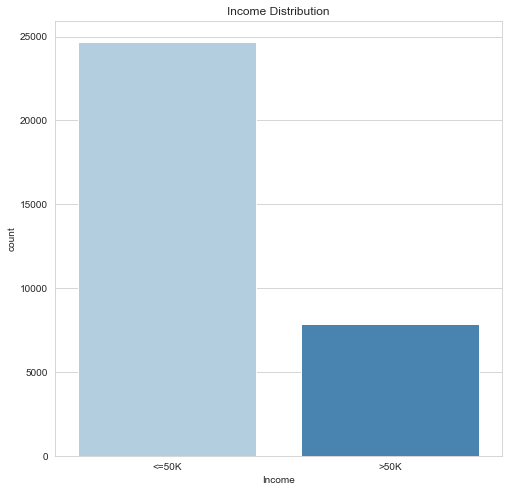

In [23]:
plt.figure(figsize = (8,8))
income = sns.countplot(x = df['Income'], palette = 'Blues')
income.set_title('Income Distribution')

plt.show()

As you can see, Income target variable is not evenly distributed. With <=50K Income dominate in around 75% of the target variable. So I decided to treat this imbalanced data with SMOTE technique to find out whether handling imbalanced data improve our accuracy model or not.

In [24]:
x_test_scl.shape, y_test.shape, x_train_scl.shape, y_train.shape

((6508, 11), (6508,), (26029, 11), (26029,))

In [25]:
sm_lr = SMOTE(random_state = 5)
x_tr_sm, y_tr_sm = sm_lr.fit_sample(x_train_scl, y_train)

In [26]:
print('Target variable shape before Oversampling (SMOTE) {}'.format(Counter(y_train)))
print('Target variable shape after Oversampling (SMOTE) {}'.format(Counter(y_tr_sm)))

Target variable shape before Oversampling (SMOTE) Counter({0: 19723, 1: 6306})
Target variable shape after Oversampling (SMOTE) Counter({0: 19723, 1: 19723})


In [27]:
lr_smote = LogisticRegression()
lr_smote.fit(x_tr_sm, y_tr_sm)

y_pred_lr_smote = lr_smote.predict(x_test_scl)

accu_lr_smote = accuracy_score(y_test, y_pred_lr_smote)

print('Score for test data in Logistic Regression Model with applying SMOTE method is {:.4f}'.format(accu_lr_smote))

Score for test data in Logistic Regression Model with applying SMOTE method is 0.7365


From accuracy score above, it seems that applying SMOTE technique, does not really improve our accuracy score. Let's take a look at the classification report for each model.

In [28]:
#baseline model
print(classification_report(y_test, y_pred_lrbm))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4975
           1       0.63      0.41      0.50      1533

    accuracy                           0.81      6508
   macro avg       0.74      0.67      0.69      6508
weighted avg       0.79      0.81      0.79      6508



In [29]:
#smote model
print(classification_report(y_test, y_pred_lr_smote))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      4975
           1       0.46      0.76      0.58      1533

    accuracy                           0.74      6508
   macro avg       0.69      0.74      0.69      6508
weighted avg       0.80      0.74      0.75      6508



Apparently, applying SMOTE improve the recall score on 1 (>50K Income) but reduces its precision score on 1 and recall value on 0. Also it greatly reduces our accuracy score. I guess it is not really worth the risk to use this technique.

# Models

There are so many classification model in machine learning. In this case I will use 3 models which are :
1. Logistic Regression
2. Support Vector Classifier (SVC)
3. Random Forest Classifier
4. XGBoost Classifier

For each model, I will do a hyperparameter tuning.

In [30]:
x_train_scl.shape, y_train.shape, x_test_scl.shape, y_test.shape

((26029, 11), (26029,), (6508, 11), (6508,))

## Model 1 - Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(x_train_scl, y_train)

y_pred_1 = lr.predict(x_test_scl)

accu_1 = accuracy_score(y_test, y_pred_1)

testlr1_score = lr.score(x_test_scl, y_test)
trainlr1_score = lr.score(x_train_scl, y_train)

print('Accuracy Score in Logistic Regression Model is {:.4f}'.format(accu_1))
print('Score for test data in Logistic Regression Model is {:.4f}'.format(testlr1_score))
print('Score for train data in Logistic Regression Model is {:.4f}'.format(trainlr1_score))

Accuracy Score in Logistic Regression Model is 0.8053
Score for test data in Logistic Regression Model is 0.8053
Score for train data in Logistic Regression Model is 0.8054


There is no problem in overfitting/underfitting in Logistic Regression model as there is no big difference between test score and train score

## Model 2 - Logistic Regression with Hyperparameter Tuning

In [32]:
parameter_logreg = {
    'C' : np.logspace(-4,4,20),
    'fit_intercept' : [True, False],
    'max_iter' : [100, 1000, 10000]
}

In [33]:
lr_gs = GridSearchCV(
    lr, parameter_logreg, cv = 5, verbose = 3
    )

lr_gs.fit(x_train_scl, y_train)
lr_gs.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] C=0.0001, fit_intercept=True, max_iter=100 ......................
[CV]  C=0.0001, fit_intercept=True, max_iter=100, score=0.760, total=   0.1s
[CV] C=0.0001, fit_intercept=True, max_iter=100 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.0001, fit_intercept=True, max_iter=100, score=0.759, total=   0.1s
[CV] C=0.0001, fit_intercept=True, max_iter=100 ......................
[CV]  C=0.0001, fit_intercept=True, max_iter=100, score=0.758, total=   0.1s
[CV] C=0.0001, fit_intercept=True, max_iter=100 ......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.0001, fit_intercept=True, max_iter=100, score=0.758, total=   0.2s
[CV] C=0.0001, fit_intercept=True, max_iter=100 ......................
[CV]  C=0.0001, fit_intercept=True, max_iter=100, score=0.762, total=   0.1s
[CV] C=0.0001, fit_intercept=True, max_iter=1000 .....................
[CV]  C=0.0001, fit_intercept=True, max_iter=1000, score=0.760, total=   0.1s
[CV] C=0.0001, fit_intercept=True, max_iter=1000 .....................
[CV]  C=0.0001, fit_intercept=True, max_iter=1000, score=0.759, total=   0.1s
[CV] C=0.0001, fit_intercept=True, max_iter=1000 .....................
[CV]  C=0.0001, fit_intercept=True, max_iter=1000, score=0.758, total=   0.1s
[CV] C=0.0001, fit_intercept=True, max_iter=1000 .....................
[CV]  C=0.0001, fit_intercept=True, max_iter=1000, score=0.758, total=   0.1s
[CV] C=0.0001, fit_intercept=True, max_iter=1000 .....................
[CV]  C=0.0001, fit_intercept=True, max_iter=1000, score=0.762, total=   0.1s
[CV] C=0.0001, fit_intercept=T

[CV]  C=0.00026366508987303583, fit_intercept=False, max_iter=10000, score=0.775, total=   0.1s
[CV] C=0.00026366508987303583, fit_intercept=False, max_iter=10000 ...
[CV]  C=0.00026366508987303583, fit_intercept=False, max_iter=10000, score=0.774, total=   0.1s
[CV] C=0.00026366508987303583, fit_intercept=False, max_iter=10000 ...
[CV]  C=0.00026366508987303583, fit_intercept=False, max_iter=10000, score=0.775, total=   0.1s
[CV] C=0.00026366508987303583, fit_intercept=False, max_iter=10000 ...
[CV]  C=0.00026366508987303583, fit_intercept=False, max_iter=10000, score=0.780, total=   0.1s
[CV] C=0.0006951927961775605, fit_intercept=True, max_iter=100 .......
[CV]  C=0.0006951927961775605, fit_intercept=True, max_iter=100, score=0.800, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=True, max_iter=100 .......
[CV]  C=0.0006951927961775605, fit_intercept=True, max_iter=100, score=0.791, total=   0.2s
[CV] C=0.0006951927961775605, fit_intercept=True, max_iter=100 .......
[CV]  

[CV]  C=0.0018329807108324356, fit_intercept=False, max_iter=100, score=0.805, total=   0.1s
[CV] C=0.0018329807108324356, fit_intercept=False, max_iter=100 ......
[CV]  C=0.0018329807108324356, fit_intercept=False, max_iter=100, score=0.801, total=   0.1s
[CV] C=0.0018329807108324356, fit_intercept=False, max_iter=100 ......
[CV]  C=0.0018329807108324356, fit_intercept=False, max_iter=100, score=0.804, total=   0.2s
[CV] C=0.0018329807108324356, fit_intercept=False, max_iter=1000 .....
[CV]  C=0.0018329807108324356, fit_intercept=False, max_iter=1000, score=0.812, total=   0.2s
[CV] C=0.0018329807108324356, fit_intercept=False, max_iter=1000 .....
[CV]  C=0.0018329807108324356, fit_intercept=False, max_iter=1000, score=0.805, total=   0.1s
[CV] C=0.0018329807108324356, fit_intercept=False, max_iter=1000 .....
[CV]  C=0.0018329807108324356, fit_intercept=False, max_iter=1000, score=0.805, total=   0.2s
[CV] C=0.0018329807108324356, fit_intercept=False, max_iter=1000 .....
[CV]  C=0.001

[CV]  C=0.012742749857031334, fit_intercept=True, max_iter=1000, score=0.803, total=   0.3s
[CV] C=0.012742749857031334, fit_intercept=True, max_iter=1000 .......
[CV]  C=0.012742749857031334, fit_intercept=True, max_iter=1000, score=0.802, total=   0.2s
[CV] C=0.012742749857031334, fit_intercept=True, max_iter=10000 ......
[CV]  C=0.012742749857031334, fit_intercept=True, max_iter=10000, score=0.810, total=   0.2s
[CV] C=0.012742749857031334, fit_intercept=True, max_iter=10000 ......
[CV]  C=0.012742749857031334, fit_intercept=True, max_iter=10000, score=0.805, total=   0.2s
[CV] C=0.012742749857031334, fit_intercept=True, max_iter=10000 ......
[CV]  C=0.012742749857031334, fit_intercept=True, max_iter=10000, score=0.803, total=   0.2s
[CV] C=0.012742749857031334, fit_intercept=True, max_iter=10000 ......
[CV]  C=0.012742749857031334, fit_intercept=True, max_iter=10000, score=0.803, total=   0.2s
[CV] C=0.012742749857031334, fit_intercept=True, max_iter=10000 ......
[CV]  C=0.01274274

[CV]  C=0.03359818286283781, fit_intercept=False, max_iter=10000, score=0.803, total=   0.2s
[CV] C=0.08858667904100823, fit_intercept=True, max_iter=100 .........
[CV]  C=0.08858667904100823, fit_intercept=True, max_iter=100, score=0.811, total=   0.3s
[CV] C=0.08858667904100823, fit_intercept=True, max_iter=100 .........
[CV]  C=0.08858667904100823, fit_intercept=True, max_iter=100, score=0.804, total=   0.4s
[CV] C=0.08858667904100823, fit_intercept=True, max_iter=100 .........
[CV]  C=0.08858667904100823, fit_intercept=True, max_iter=100, score=0.804, total=   0.4s
[CV] C=0.08858667904100823, fit_intercept=True, max_iter=100 .........
[CV]  C=0.08858667904100823, fit_intercept=True, max_iter=100, score=0.804, total=   0.3s
[CV] C=0.08858667904100823, fit_intercept=True, max_iter=100 .........
[CV]  C=0.08858667904100823, fit_intercept=True, max_iter=100, score=0.803, total=   0.2s
[CV] C=0.08858667904100823, fit_intercept=True, max_iter=1000 ........
[CV]  C=0.08858667904100823, fi

[CV]  C=0.23357214690901212, fit_intercept=False, max_iter=1000, score=0.804, total=   0.2s
[CV] C=0.23357214690901212, fit_intercept=False, max_iter=1000 .......
[CV]  C=0.23357214690901212, fit_intercept=False, max_iter=1000, score=0.804, total=   0.2s
[CV] C=0.23357214690901212, fit_intercept=False, max_iter=1000 .......
[CV]  C=0.23357214690901212, fit_intercept=False, max_iter=1000, score=0.804, total=   0.2s
[CV] C=0.23357214690901212, fit_intercept=False, max_iter=1000 .......
[CV]  C=0.23357214690901212, fit_intercept=False, max_iter=1000, score=0.803, total=   0.2s
[CV] C=0.23357214690901212, fit_intercept=False, max_iter=10000 ......
[CV]  C=0.23357214690901212, fit_intercept=False, max_iter=10000, score=0.809, total=   0.1s
[CV] C=0.23357214690901212, fit_intercept=False, max_iter=10000 ......
[CV]  C=0.23357214690901212, fit_intercept=False, max_iter=10000, score=0.804, total=   0.1s
[CV] C=0.23357214690901212, fit_intercept=False, max_iter=10000 ......
[CV]  C=0.2335721469

[CV]  C=1.623776739188721, fit_intercept=True, max_iter=10000, score=0.804, total=   0.5s
[CV] C=1.623776739188721, fit_intercept=True, max_iter=10000 .........
[CV]  C=1.623776739188721, fit_intercept=True, max_iter=10000, score=0.804, total=   0.5s
[CV] C=1.623776739188721, fit_intercept=True, max_iter=10000 .........
[CV]  C=1.623776739188721, fit_intercept=True, max_iter=10000, score=0.803, total=   0.4s
[CV] C=1.623776739188721, fit_intercept=False, max_iter=100 ..........
[CV]  C=1.623776739188721, fit_intercept=False, max_iter=100, score=0.809, total=   0.2s
[CV] C=1.623776739188721, fit_intercept=False, max_iter=100 ..........
[CV]  C=1.623776739188721, fit_intercept=False, max_iter=100, score=0.804, total=   0.2s
[CV] C=1.623776739188721, fit_intercept=False, max_iter=100 ..........
[CV]  C=1.623776739188721, fit_intercept=False, max_iter=100, score=0.804, total=   0.2s
[CV] C=1.623776739188721, fit_intercept=False, max_iter=100 ..........
[CV]  C=1.623776739188721, fit_interc

[CV]  C=11.288378916846883, fit_intercept=True, max_iter=100, score=0.804, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=True, max_iter=100 ..........
[CV]  C=11.288378916846883, fit_intercept=True, max_iter=100, score=0.803, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=True, max_iter=1000 .........
[CV]  C=11.288378916846883, fit_intercept=True, max_iter=1000, score=0.811, total=   0.4s
[CV] C=11.288378916846883, fit_intercept=True, max_iter=1000 .........
[CV]  C=11.288378916846883, fit_intercept=True, max_iter=1000, score=0.804, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=True, max_iter=1000 .........
[CV]  C=11.288378916846883, fit_intercept=True, max_iter=1000, score=0.804, total=   0.3s
[CV] C=11.288378916846883, fit_intercept=True, max_iter=1000 .........
[CV]  C=11.288378916846883, fit_intercept=True, max_iter=1000, score=0.804, total=   0.2s
[CV] C=11.288378916846883, fit_intercept=True, max_iter=1000 .........
[CV]  C=11.288378916846883, fit_inte

[CV]  C=29.763514416313132, fit_intercept=False, max_iter=1000, score=0.803, total=   0.2s
[CV] C=29.763514416313132, fit_intercept=False, max_iter=10000 .......
[CV]  C=29.763514416313132, fit_intercept=False, max_iter=10000, score=0.809, total=   0.2s
[CV] C=29.763514416313132, fit_intercept=False, max_iter=10000 .......
[CV]  C=29.763514416313132, fit_intercept=False, max_iter=10000, score=0.804, total=   0.2s
[CV] C=29.763514416313132, fit_intercept=False, max_iter=10000 .......
[CV]  C=29.763514416313132, fit_intercept=False, max_iter=10000, score=0.804, total=   0.2s
[CV] C=29.763514416313132, fit_intercept=False, max_iter=10000 .......
[CV]  C=29.763514416313132, fit_intercept=False, max_iter=10000, score=0.804, total=   0.2s
[CV] C=29.763514416313132, fit_intercept=False, max_iter=10000 .......
[CV]  C=29.763514416313132, fit_intercept=False, max_iter=10000, score=0.803, total=   0.3s
[CV] C=78.47599703514607, fit_intercept=True, max_iter=100 ...........
[CV]  C=78.475997035146

[CV]  C=206.913808111479, fit_intercept=False, max_iter=100, score=0.804, total=   0.1s
[CV] C=206.913808111479, fit_intercept=False, max_iter=100 ...........
[CV]  C=206.913808111479, fit_intercept=False, max_iter=100, score=0.804, total=   0.1s
[CV] C=206.913808111479, fit_intercept=False, max_iter=100 ...........
[CV]  C=206.913808111479, fit_intercept=False, max_iter=100, score=0.804, total=   0.2s
[CV] C=206.913808111479, fit_intercept=False, max_iter=100 ...........
[CV]  C=206.913808111479, fit_intercept=False, max_iter=100, score=0.803, total=   0.2s
[CV] C=206.913808111479, fit_intercept=False, max_iter=1000 ..........
[CV]  C=206.913808111479, fit_intercept=False, max_iter=1000, score=0.809, total=   0.2s
[CV] C=206.913808111479, fit_intercept=False, max_iter=1000 ..........
[CV]  C=206.913808111479, fit_intercept=False, max_iter=1000, score=0.804, total=   0.2s
[CV] C=206.913808111479, fit_intercept=False, max_iter=1000 ..........
[CV]  C=206.913808111479, fit_intercept=Fals

[CV]  C=1438.44988828766, fit_intercept=True, max_iter=1000, score=0.804, total=   0.3s
[CV] C=1438.44988828766, fit_intercept=True, max_iter=1000 ...........
[CV]  C=1438.44988828766, fit_intercept=True, max_iter=1000, score=0.803, total=   0.3s
[CV] C=1438.44988828766, fit_intercept=True, max_iter=10000 ..........
[CV]  C=1438.44988828766, fit_intercept=True, max_iter=10000, score=0.811, total=   0.3s
[CV] C=1438.44988828766, fit_intercept=True, max_iter=10000 ..........
[CV]  C=1438.44988828766, fit_intercept=True, max_iter=10000, score=0.804, total=   0.5s
[CV] C=1438.44988828766, fit_intercept=True, max_iter=10000 ..........
[CV]  C=1438.44988828766, fit_intercept=True, max_iter=10000, score=0.804, total=   0.3s
[CV] C=1438.44988828766, fit_intercept=True, max_iter=10000 ..........
[CV]  C=1438.44988828766, fit_intercept=True, max_iter=10000, score=0.804, total=   0.6s
[CV] C=1438.44988828766, fit_intercept=True, max_iter=10000 ..........
[CV]  C=1438.44988828766, fit_intercept=Tr

[CV]  C=10000.0, fit_intercept=True, max_iter=100, score=0.811, total=   0.2s
[CV] C=10000.0, fit_intercept=True, max_iter=100 .....................
[CV]  C=10000.0, fit_intercept=True, max_iter=100, score=0.804, total=   0.3s
[CV] C=10000.0, fit_intercept=True, max_iter=100 .....................
[CV]  C=10000.0, fit_intercept=True, max_iter=100, score=0.804, total=   0.3s
[CV] C=10000.0, fit_intercept=True, max_iter=100 .....................


C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10000.0, fit_intercept=True, max_iter=100, score=0.804, total=   0.4s
[CV] C=10000.0, fit_intercept=True, max_iter=100 .....................
[CV]  C=10000.0, fit_intercept=True, max_iter=100, score=0.803, total=   0.2s
[CV] C=10000.0, fit_intercept=True, max_iter=1000 ....................
[CV]  C=10000.0, fit_intercept=True, max_iter=1000, score=0.811, total=   0.2s
[CV] C=10000.0, fit_intercept=True, max_iter=1000 ....................
[CV]  C=10000.0, fit_intercept=True, max_iter=1000, score=0.804, total=   0.3s
[CV] C=10000.0, fit_intercept=True, max_iter=1000 ....................
[CV]  C=10000.0, fit_intercept=True, max_iter=1000, score=0.804, total=   0.3s
[CV] C=10000.0, fit_intercept=True, max_iter=1000 ....................
[CV]  C=10000.0, fit_intercept=True, max_iter=1000, score=0.804, total=   0.3s
[CV] C=10000.0, fit_intercept=True, max_iter=1000 ....................
[CV]  C=10000.0, fit_intercept=True, max_iter=1000, score=0.803, total=   0.2s
[CV] C=10000.0, fit_int

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.2min finished


{'C': 0.004832930238571752, 'fit_intercept': False, 'max_iter': 100}

In [34]:
lr_gs.best_estimator_

LogisticRegression(C=0.004832930238571752, fit_intercept=False)

In [35]:
lr_2 = LogisticRegression(C=0.004832930238571752, fit_intercept = False)
lr_2.fit(x_train_scl, y_train)

y_pred_2 = lr_2.predict(x_test_scl)

accu_2 = accuracy_score(y_test, y_pred_2)

testlr2_score = lr_2.score(x_test_scl, y_test)
trainlr2_score = lr_2.score(x_train_scl, y_train)

print('Accuracy Score in Logistic Regression Model with Hyperparameter Tuning is {:.4f}'.format(accu_2))
print('Score for test data in Logistic Regression Model with Hyperparameter Tuning is {:.4f}'.format(testlr2_score))
print('Score for train data in Logistic Regression Model with Hyperparameter Tuning is {:.4f}'.format(trainlr2_score))

Accuracy Score in Logistic Regression Model with Hyperparameter Tuning is 0.8009
Score for test data in Logistic Regression Model with Hyperparameter Tuning is 0.8009
Score for train data in Logistic Regression Model with Hyperparameter Tuning is 0.8060


There is no problem in overfitting/underfitting in Logistic Regression model with Hyperparameter Tuning as there is no big difference between test score and train score.
Hyperparameter tuning with Logistic Regression does not improve our accuracy score.

## Model 3 - Support Vector Classifier (SVC)

In [36]:
svc = SVC(probability = True)
svc.fit(x_train_scl, y_train)

y_pred_3 = svc.predict(x_test_scl)

accu_3 = accuracy_score(y_test, y_pred_3)

testsvc1_score = svc.score(x_test_scl, y_test)
trainsvc1_score = svc.score(x_train_scl, y_train)

print('Accuracy Score in Support Vector Classifier (SVC) is {:.4f}'.format(accu_3))
print('Score for test data in Support Vector Classifier (SVC) is {:.4f}'.format(testsvc1_score))
print('Score for train data in Support Vector Classifier (SVC) is {:.4f}'.format(trainsvc1_score))

Accuracy Score in Support Vector Classifier (SVC) is 0.8210
Score for test data in Support Vector Classifier (SVC) is 0.8210
Score for train data in Support Vector Classifier (SVC) is 0.8247


There is no problem in overfitting/underfitting in Support Vector Classifier (SVC) model as there is no big difference between test score and train score

## Model 4 - Support Vector Classifier (SVC) with Hyperparameter tuning

In [37]:
parameter_svc = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [38]:
svc_rs = RandomizedSearchCV(
    svc, parameter_svc, cv = 5, verbose = 3
    )

svc_rs.fit(x_train_scl, y_train)
svc_rs.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=rbf, gamma=0.01, C=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... kernel=rbf, gamma=0.01, C=100, score=0.833, total= 3.2min
[CV] kernel=rbf, gamma=0.01, C=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV] ....... kernel=rbf, gamma=0.01, C=100, score=0.824, total= 2.2min
[CV] kernel=rbf, gamma=0.01, C=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.4min remaining:    0.0s


[CV] ....... kernel=rbf, gamma=0.01, C=100, score=0.830, total= 2.0min
[CV] kernel=rbf, gamma=0.01, C=100 ...................................
[CV] ....... kernel=rbf, gamma=0.01, C=100, score=0.829, total= 1.8min
[CV] kernel=rbf, gamma=0.01, C=100 ...................................
[CV] ....... kernel=rbf, gamma=0.01, C=100, score=0.829, total= 1.8min
[CV] kernel=sigmoid, gamma=0.1, C=100 ................................
[CV] .... kernel=sigmoid, gamma=0.1, C=100, score=0.655, total= 1.4min
[CV] kernel=sigmoid, gamma=0.1, C=100 ................................
[CV] .... kernel=sigmoid, gamma=0.1, C=100, score=0.668, total= 1.4min
[CV] kernel=sigmoid, gamma=0.1, C=100 ................................
[CV] .... kernel=sigmoid, gamma=0.1, C=100, score=0.665, total= 1.3min
[CV] kernel=sigmoid, gamma=0.1, C=100 ................................
[CV] .... kernel=sigmoid, gamma=0.1, C=100, score=0.675, total= 2.4min
[CV] kernel=sigmoid, gamma=0.1, C=100 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 99.8min finished


{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

In [39]:
svc_rs.best_estimator_

SVC(C=100, gamma=0.01, probability=True)

In [40]:
svc_2 = SVC(C=1, gamma=0.1, kernel='poly', probability=True)
svc_2.fit(x_train_scl, y_train)

y_pred_4 = svc_2.predict(x_test_scl)

accu_4 = accuracy_score(y_test, y_pred_4)

testsvc2_score = svc_2.score(x_test_scl, y_test)
trainsvc2_score = svc_2.score(x_train_scl, y_train)

print('Accuracy Score in Support Vector Classifier (SVC) with Hyperparameter Tuning is {:.4f}'.format(accu_4))
print('Score for test data in Support Vector Classifier (SVC) with Hyperparameter Tuning is {:.4f}'.format(testsvc2_score))
print('Score for train data in Support Vector Classifier (SVC) with Hyperparameter Tuning is {:.4f}'.format(trainsvc2_score))

Accuracy Score in Support Vector Classifier (SVC) with Hyperparameter Tuning is 0.8225
Score for test data in Support Vector Classifier (SVC) with Hyperparameter Tuning is 0.8225
Score for train data in Support Vector Classifier (SVC) with Hyperparameter Tuning is 0.8245


There is no problem in overfitting/underfitting in Support Vector Classifier (SVC) with Hyperparameter Tuning as there is no big difference between test score and train score.
Hyperparameter tuning with SVC improve a bit our accuracy score.

## Model 5 - Random Forest Classifier

In [41]:
rfc = RandomForestClassifier()
rfc.fit(x_train_scl, y_train)

y_pred_5 = rfc.predict(x_test_scl)

accu_5 = accuracy_score(y_test, y_pred_5)

testrfc1_score = rfc.score(x_test_scl, y_test)
trainrfc1_score = rfc.score(x_train_scl, y_train)

print('Accuracy Score in Random Forest Classifier is {:.4f}'.format(accu_5))
print('Score for test data in Random Forest Classifier is {:.4f}'.format(testrfc1_score))
print('Score for train data in Random Forest Classifier is {:.4f}'.format(trainrfc1_score))

Accuracy Score in Random Forest Classifier is 0.8205
Score for test data in Random Forest Classifier is 0.8205
Score for train data in Random Forest Classifier is 0.9665


There is no problem in overfitting/underfitting in Random Forest Classifier model as the difference between the test score and train score is forgiven.

## Model 6 - Random Forest Classifier with Hyperparameter Tuning

In [42]:
parameter_rfc = {
    'max_depth' : [5, 10, 15, 20, 40, 60],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1, 2, 4],
    'n_estimators' : [100, 200, 400, 600, 800, 1000],
    'bootstrap' : [True, False],
    'max_features' : ['auto', 'sqrt']
}

In [43]:
rfc_rs = RandomizedSearchCV(
    rfc, parameter_rfc, cv = 5, verbose = 3
    )

rfc_rs.fit(x_train_scl, y_train)
rfc_rs.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, score=0.822, total=   1.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, score=0.822, total=   1.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, score=0.822, total=   0.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, score=0.818, total=   0.9s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=False, score=0.822, total=   0.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=15, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=15, bootstrap=False, score=0.841, total=  17.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=0.832, total=  11.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=0.831, total=  11.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=0.830, total=  11.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=0.836, total=  11.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_de

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.4min finished


{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

In [44]:
rfc_rs.best_estimator_

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=600)

In [45]:
rfc_2 = RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=400)
rfc_2.fit(x_train_scl, y_train)

y_pred_6 = rfc_2.predict(x_test_scl)

accu_6 = accuracy_score(y_test, y_pred_6)

testrfc2_score = rfc_2.score(x_test_scl, y_test)
trainrfc2_score = rfc_2.score(x_train_scl, y_train)

print('Accuracy Score in Random Forest Classifier with Hyperparameter Tuning is {:.4f}'.format(accu_6))
print('Score for test data in Random Forest Classifier with Hyperparameter Tuning is {:.4f}'.format(testrfc2_score))
print('Score for train data in Random Forest Classifier with Hyperparameter Tuning is {:.4f}'.format(trainrfc2_score))

Accuracy Score in Random Forest Classifier with Hyperparameter Tuning is 0.8390
Score for test data in Random Forest Classifier with Hyperparameter Tuning is 0.8390
Score for train data in Random Forest Classifier with Hyperparameter Tuning is 0.8752


There is no problem in overfitting/underfitting in Random Forest Classifier with Hyperparameter Tuning as there is no big difference between test score and train score.
Hyperparameter tuning with Random Forest Classifier improve a bit our accuracy score by 0.015.

## Model 7 - XGBoost Classifier

In [46]:
xgb = XGBClassifier()
xgb.fit(x_train_scl, y_train)

y_pred_7 = xgb.predict(x_test_scl)
accu_7 = accuracy_score(y_test, y_pred_7)

testxgb1_score = xgb.score(x_test_scl, y_test)
trainxgb1_score = xgb.score(x_train_scl, y_train)

print('Accuracy Score in XGBoost Classifier is {:.4f}'.format(accu_7))
print('Score for test data in XGBoost Classifier is {:.4f}'.format(testxgb1_score))
print('Score for train data in XGBoost Classifier is {:.4f}'.format(trainxgb1_score))

Accuracy Score in XGBoost Classifier is 0.8425
Score for test data in XGBoost Classifier is 0.8425
Score for train data in XGBoost Classifier is 0.8728


There is no problem in overfitting/underfitting in XGBoost Classifier model as the difference between the test score and train score is forgiven.

In [47]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

## Model 8 - XGBoost Classifier with Hyperparameter Tuning

In [48]:
parameter_xgb = {
    'learning_rate' : np.arange(0.01,0.31, 0.01),
    'min_child_weight': np.arange(1,10,2),
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': np.arange(0.5, 1, 0.05),
    'colsample_bytree': np.arange(0.5, 1, 0.05),
    'max_depth': np.arange(3,11,1),
    'n_estimators' : np.arange(100,1100,100),
    'gamma' : np.arange(0, 0.6, 0.1),
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

In [49]:
xgb_rs = RandomizedSearchCV(
    xgb, parameter_xgb, cv = 5, verbose = 3
    )

xgb_rs.fit(x_train_scl, y_train)
xgb_rs.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.5, reg_alpha=0.005, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9000000000000004 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, reg_alpha=0.005, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9000000000000004, score=0.843, total=   6.3s
[CV] subsample=0.5, reg_alpha=0.005, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9000000000000004 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV]  subsample=0.5, reg_alpha=0.005, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9000000000000004, score=0.840, total=   6.2s
[CV] subsample=0.5, reg_alpha=0.005, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9000000000000004 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.5s remaining:    0.0s


[CV]  subsample=0.5, reg_alpha=0.005, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9000000000000004, score=0.840, total=   6.3s
[CV] subsample=0.5, reg_alpha=0.005, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9000000000000004 
[CV]  subsample=0.5, reg_alpha=0.005, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9000000000000004, score=0.841, total=   6.2s
[CV] subsample=0.5, reg_alpha=0.005, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9000000000000004 
[CV]  subsample=0.5, reg_alpha=0.005, n_estimators=700, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9000000000000004, score=0.839, total=   6.3s
[CV] subsample=0.5, reg_alpha=0.01, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.26, gamma=0.4, colsample_bytree=

[CV]  subsample=0.7000000000000002, reg_alpha=0.01, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.060000000000000005, gamma=0.1, colsample_bytree=0.7000000000000002, score=0.824, total=  13.4s
[CV] subsample=0.7000000000000002, reg_alpha=0.01, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.060000000000000005, gamma=0.1, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.7000000000000002, reg_alpha=0.01, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.060000000000000005, gamma=0.1, colsample_bytree=0.7000000000000002, score=0.821, total=  13.4s
[CV] subsample=0.7000000000000002, reg_alpha=0.01, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.060000000000000005, gamma=0.1, colsample_bytree=0.7000000000000002 
[CV]  subsample=0.7000000000000002, reg_alpha=0.01, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.060000000000000005, gamma=0.1, colsample_bytree=0.7000000000000002, score=0.

[CV]  subsample=0.6000000000000001, reg_alpha=0.001, n_estimators=300, min_child_weight=9, max_depth=7, learning_rate=0.15000000000000002, gamma=0.5, colsample_bytree=0.9500000000000004, score=0.833, total=   4.1s
[CV] subsample=0.6000000000000001, reg_alpha=0.001, n_estimators=300, min_child_weight=9, max_depth=7, learning_rate=0.15000000000000002, gamma=0.5, colsample_bytree=0.9500000000000004 
[CV]  subsample=0.6000000000000001, reg_alpha=0.001, n_estimators=300, min_child_weight=9, max_depth=7, learning_rate=0.15000000000000002, gamma=0.5, colsample_bytree=0.9500000000000004, score=0.835, total=   4.2s
[CV] subsample=0.6000000000000001, reg_alpha=0.001, n_estimators=300, min_child_weight=9, max_depth=7, learning_rate=0.15000000000000002, gamma=0.5, colsample_bytree=0.9500000000000004 
[CV]  subsample=0.6000000000000001, reg_alpha=0.001, n_estimators=300, min_child_weight=9, max_depth=7, learning_rate=0.15000000000000002, gamma=0.5, colsample_bytree=0.9500000000000004, score=0.834, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.5min finished


{'subsample': 0.5,
 'reg_alpha': 0.005,
 'n_estimators': 700,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.02,
 'gamma': 0.2,
 'colsample_bytree': 0.9000000000000004}

In [50]:
xgb_2 = XGBClassifier(subsample = 0.5,
 reg_alpha = 0.01,
 n_estimators = 800,
 min_child_weight = 5,
 max_depth = 5,
 learning_rate = 0.02,
 gamma = 0.0,
 colsample_bytree = 0.8000000000000003)

xgb_2.fit(x_train_scl, y_train)

y_pred_8 = xgb_2.predict(x_test_scl)
accu_8 = accuracy_score(y_test, y_pred_8)

testxgb2_score = xgb_2.score(x_test_scl, y_test)
trainxgb2_score = xgb_2.score(x_train_scl, y_train)

print('Accuracy Score in XGBoost Classifier with Hyperparameter Tuning is {:.4f}'.format(accu_8))
print('Score for test data in XGBoost Classifier with Hyperparameter Tuning is {:.4f}'.format(testxgb2_score))
print('Score for train data in XGBoost Classifier with Hyperparameter Tuning is {:.4f}'.format(trainxgb2_score))

Accuracy Score in XGBoost Classifier with Hyperparameter Tuning is 0.8427
Score for test data in XGBoost Classifier with Hyperparameter Tuning is 0.8427
Score for train data in XGBoost Classifier with Hyperparameter Tuning is 0.8525


There is no problem in overfitting/underfitting in XGBoost Classifier with Hyperparameter Tuning as there is no big difference between test score and train score.
Hyperparameter tuning with XGBoost Classifier improve a bit our accuracy score.

# Models Evaluation

## Confusion Matrix & Classification Report

Let's dive deeper into Confusion Matrix before we discuss about classification report.

In [51]:
confusion_matrix(y_test, y_pred_8)

array([[4576,  399],
       [ 625,  908]], dtype=int64)

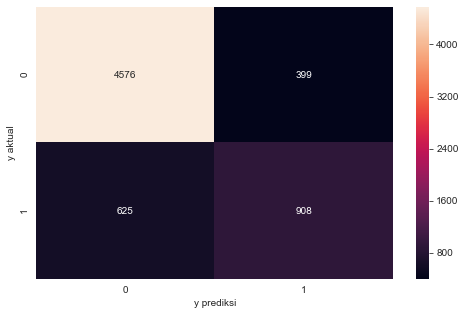

In [52]:
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_8), annot=True, fmt=".0f")
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

We have to agree to a few terms : 

First, in the previous section, I already did an encoding to the target variable (Income). So we get category 1 as Income >50K and category 0 as Income <=50K.

So let's move on to more terms :
1. True Positive (True 1)
> True 1 is when the model is correctly predicted the target variable as value 1, Income >50K (actual = 1, prediction = 1)
2. True Negative (True 0)
> True 0 is when the model is correctly predicted the target variable as value 0, Income <= 50K (actual = 0, prediction = 0)
3. False Positive (False 1)
> False 1 is when the model is wrongly predicted the target variable as value 1, Income >50K (actual = 0, prediction = 1)
4. False Negative (False 0)
> False 0 is when the model is wrongly predicted the target variable as value 0, Income <=50K (actual = 1, prediction = 0)

So, from graph above I can conclude that the value for each term from confucion matrix above is:
- TP/T1 = 908
- TN/T0 = 4576
- FP/F1 = 399
- FN/F0 = 625

<b> Accuracy Score </b><br>
From 8 models above, I always show each of the model's accuracy score. The formula for Accuracy Score is : <br>
$$ \frac {TP+TN}{TP+TN+FP+FN} $$ 
It shows how accurately model predict the true value amongst all predicted data.


From confusion matrix above, we can calculate its accuracy score : $$ Accu Score = \frac {908+4576}{908+4576+399+625}= 0.8426$$

**Recall**<br>
Also, there is a term, Recall. Recall is the fraction of true positives/negatives events that you predicted correctly as positives/negatives. Its formula is shown below for positive event: $$ \frac {TP}{TP+FN} $$ As for negative events we can use the formula shown below : $$ \frac {TN}{TN+FP} $$

Again we calculate Recall for each value, 0 and 1 from confusion matrix above. $$ RecallOne = \frac {908}{908+625} =  0.5975$$

$$ RecallZero = \frac {4576}{4576+399} =  0.9197$$ 

**Precision**<br>
There's also another term called Precision which is fraction of predicted positives/negatives events that are actually positive/negative. Its formula is shown below for positive event (Sensitivity) : $$ \frac {TP}{TP+FP} $$ <br>
As for negative events, we can use the formula shown below (Specificity) : $$ \frac {TN}{TN+FN} $$ <br>

Again we calculate Precision for each value, 0 and 1 from confusion matrix above. $$ PrecisionOne = \frac {908}{908+399} =  0.6947$$

 $$ PrecisionZero = \frac {4576}{4576+625} =  0.8798$$ 

**F1-Score** <br>
F1-Score is needed when you want to seek a balance between Precision and Recall. The F1 score is the harmonic mean of recall and precision, with a higher score as a better model. We can calculate the score with these formula : $$ F1-Score = 2 * \frac {(Precision * Recall)} {Precision + Recall} $$ <br>

Again we calculate F1 Score for each value, 0 and 1 from confusion matrix above. $$ F1-ScoreOne = 2 * \frac  {0.6947 * 0.5975}{0.6947 + 0.5975} =  0.6424$$

$$ F1-ScoreZero = 2 * \frac  {0.8798 * 0.9197}{0.8798 + 0.9197} =  0.8993$$

F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall and there is an uneven class distribution (large number of True Negatives).

In [53]:
print(classification_report(y_test, y_pred_8))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4975
           1       0.69      0.59      0.64      1533

    accuracy                           0.84      6508
   macro avg       0.79      0.76      0.77      6508
weighted avg       0.84      0.84      0.84      6508



From our manual calculation on Accuracy Score, Recall, Precision, and F1 Score when compared to the classification report above is the same.

In [54]:
list_pred = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6, y_pred_7, y_pred_8]
list_accu = [accu_1, accu_2, accu_3, accu_4, accu_5, accu_6, accu_7, accu_8]
model_names = ['Logistic Regression', 'Logistic Regression with Hyperparameter Tuning',
               'Support Vector Classifier (SVC)', 'Support Vector Classifier (SVC) with Hyperparameter Tuning',
               'Random Forest Classifier', 'Random Forest Classifier with Hyperparameter Tuning',
               'XGBoost Classifier', 'XGBoost Classifier with Hyperparameter Tuning'
              ]

list_f1 = []
for i in list_pred:
    list_f1.append(f1_score(y_test+1, i+1))

df_me = pd.DataFrame([list_accu, list_f1], columns = model_names, index = ['Accuracy Score', 'F1-Score']).T
df_me

# for i, j in enumerate(list_accu):
#     print ('Accuracy Score for Model {} is {:.4f}'.format(model_names[i], j))


# for i, predictions in enumerate(list_pred) :
#     print ("Classification Report of ", model_names[i])
#     print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))


,Accuracy Score,F1-Score
Logistic Regression,0.805317,0.879253
Logistic Regression with Hyperparameter Tuning,0.800860,0.876712
Support Vector Classifier (SVC),0.820990,0.889332
Support Vector Classifier (SVC) with Hyperparameter Tuning,0.822526,0.890718
Random Forest Classifier,0.820529,0.884767
Random Forest Classifier with Hyperparameter Tuning,0.838967,0.897516
XGBoost Classifier,0.842502,0.899124
XGBoost Classifier with Hyperparameter Tuning,0.842655,0.899371


In [55]:
df_me.to_csv('df_me_rs.csv')

For the case we are working on, we try to predict one income into two categories <=50K Income and >50K. We can use accuracy score and f1-score for evaluating our model, so from data above, the optimum model with highest accuracy score and F1-score is XGBoost Classifier model with Hyperparameter Tuning.

## AUC-ROC Curve

Also we can use Area Under Curve (AUC)- Receiver Opearting Characteristics (ROC) curve to measure model performance. 

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. In our case, higher the AUC the better the model is at distinguishing between resident with >50K Income and <=50K Income.

The ROC curve is plotted with True Positive Rate (TPR) against the False Positive Rate (FPR) where TPR is on y-axis and FPR is on the x-axis. TPR is recall or its formula is $ \frac {TP}{TP+FN} $ and FPR is 1 - Specifity or its formula is $ \frac {FP}{TN+FP} $

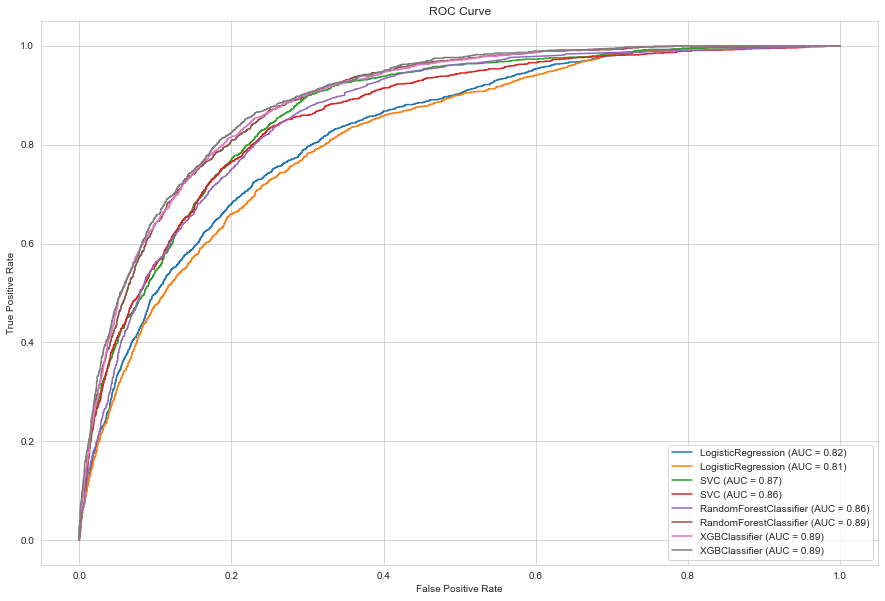

In [56]:
classifiers = [lr, lr_2, svc, svc_2, rfc, rfc_2, xgb, xgb_2]

plt.figure(figsize = (15,10))
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test_scl, y_test, ax=ax)
plt.title('ROC Curve')
plt.show()
fig = ax.get_figure()
fig.savefig('ROC Curve.png')

In [57]:
classifiers = [lr, lr_2, svc, svc_2, rfc, rfc_2, xgb, xgb_2]

y_score_1 = lr.predict_proba(x_test_scl)[:, 1]
auc_score_1 = roc_auc_score(y_test, y_score_1)

y_score_2 = lr_2.predict_proba(x_test_scl)[:, 1]
auc_score_2 = roc_auc_score(y_test, y_score_2)

y_score_3 = svc.predict_proba(x_test_scl)[:, 1]
auc_score_3 = roc_auc_score(y_test, y_score_3)

y_score_4 = svc_2.predict_proba(x_test_scl)[:, 1]
auc_score_4 = roc_auc_score(y_test, y_score_4)

y_score_5 = rfc.predict_proba(x_test_scl)[:, 1]
auc_score_5 = roc_auc_score(y_test, y_score_5)

y_score_6 = rfc_2.predict_proba(x_test_scl)[:, 1]
auc_score_6 = roc_auc_score(y_test, y_score_6)

y_score_7 = xgb.predict_proba(x_test_scl)[:, 1]
auc_score_7 = roc_auc_score(y_test, y_score_7)

y_score_8 = xgb.predict_proba(x_test_scl)[:, 1]
auc_score_8 = roc_auc_score(y_test, y_score_8)

In [58]:
list_auc = [auc_score_1, auc_score_2, auc_score_3, auc_score_4, 
             auc_score_5, auc_score_6, auc_score_7, auc_score_8]
model_names = ['Logistic Regression', 'Logistic Regression with Hyperparameter Tuning',
               'Support Vector Classifier (SVC)', 'Support Vector Classifier (SVC) with Hyperparameter Tuning',
               'Random Forest Classifier', 'Random Forest Classifier with Hyperparameter Tuning',
               'XGBoost Classifier', 'XGBoost Classifier with Hyperparameter Tuning'
              ]

for i, j in enumerate(list_auc):
    print ('Area Under ROC Curve for {} Model is {:.5f}'.format(model_names[i], j))

Area Under ROC Curve for Logistic Regression Model is 0.82439
Area Under ROC Curve for Logistic Regression with Hyperparameter Tuning Model is 0.81496
Area Under ROC Curve for Support Vector Classifier (SVC) Model is 0.86774
Area Under ROC Curve for Support Vector Classifier (SVC) with Hyperparameter Tuning Model is 0.85892
Area Under ROC Curve for Random Forest Classifier Model is 0.86121
Area Under ROC Curve for Random Forest Classifier with Hyperparameter Tuning Model is 0.88688
Area Under ROC Curve for XGBoost Classifier Model is 0.88830
Area Under ROC Curve for XGBoost Classifier with Hyperparameter Tuning Model is 0.88830


XGBoost Classifier and XGBoost Classifier with Hyperparameter Tuning has the biggest Area Under ROC Curve with 0.88830 amongst all models. Also XGBoost Classifier with Hyperparameter Tuning has the biggest Accuracy Score and F1-Score, So we are going to use it as the main model.

# Conclusion

- We tried 4 different types of models (Logistic Regression, Support Vector Classifier, Random Forest Classifier, and XGBoost Classifier) with each models we conduct hyperparameter tuning. 
- We use 3 kinds of Model Evaluation consisting of Accuracy Score, F1-Score, and AU-ROC Curve.
- XGBoost Classifier with Hyperparameter Tuning is the best model with Accuracy Score of 0.842655, F1-Score of 0.899371, and AU-ROC Curve Score of 0.88830.
- We are going to use XGBoost Classifier with Hyperparameter Tuning to predict whether people has Income more than 50K per year or not.

Thank you for reaching the end of the notebook.

Regards, Fariz Darmawan.